# Detecção de Fraude de Cartão de Crédito
 ### _Detecção de fraude em cartão de crédito_

<p align="center">
  <img src="cartao.jpg" >
</p>

Talvez um dos maiores avanços do sistema financeiro é o cartão de crédito. Simplesmente pegue seu cartão, insira na maquina, coloque sua senha e aí está, um pagamento feito com sucesso e segurança. Nada mais de cheques sem fundos! Cheque? O que é isso?

Uma forma rápida, prática e segura de fazer compras pela internet e presencialmente...
Segura? Sim, mas não perfeita. A fraude online de cartão de crédito vem aumentando em velocidades alarmantes enquanto fraudes presenciais foram diminuindo devido a inserção de novas tecnologias.

É necessário evitar fraudes sem abrir mão da agilidade e praticidade do pagamento em cartão de crédito. Com talvez bilhões de transações pelo mundo, é humanamente impossível processar manualmente todas as operações e um simples algoritmo não consegue dar conta de ser preciso, gerando vários falsos positivos.

A solução para isto é o uso de métodos preditivos (ou supervisionados) de Machine Learning. O método consegue se manter mais atualizado que um algoritmo, se adaptando ao modus operandi inconstante de criminosos e ofere a agilidade e confiança necessária

Os dados foram baixados do [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud) e não foram disponibilizados nesta pasta Git devido a falta de espaço disponível.

Primeiramente gostaria de discutir sobre a base de dados.
A base de dados baixada apresenta dados **reais** de transações bancarias, com nomes e números que podem identificar estabelecimentos e pessoas. Para proteger a privacidade deste foi aplicada uma PCA (Principal Component Analysis, ou Análise de Componentes Principais) que visa diminuir a dimensionalidade dos dados, reduzindo o número de variáveis preditivas e anonimizar os dados.
Tendo em mente isso precisamos ter a humildade de dizer que não sabemos o que essas componentes significam. Sabendo as varíaveis originais poderiamos pensar em jeitos melhores de prevenção anti-fraude, mas vamos aproveitar esses dados **reais** e fazer o melhor possível.

Primeiramente vamos ver nossos dados em histogramas e normalizar os valores. A normalização vai ser importante no cálculo de correlações para garantir que os dados estejam equilibrados e que valores numericamente altos não influenciam desproporcionalmente na correlação.

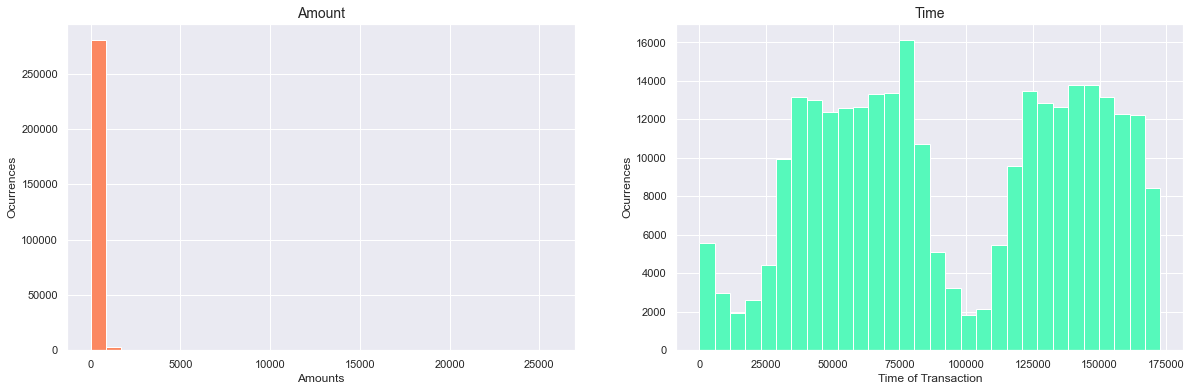

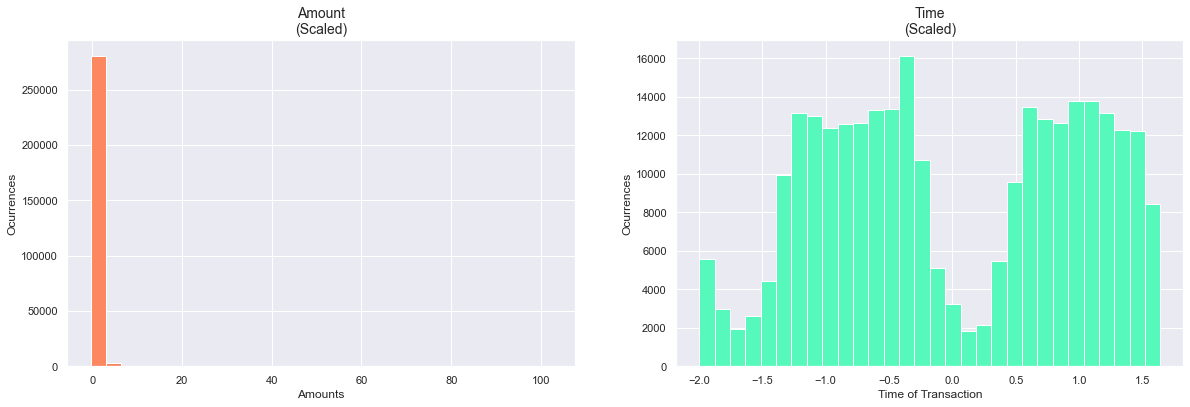

In [104]:
import pandas as pd
import numpy as np
import pylab as plt
from sklearn.preprocessing import StandardScaler

#Importa os dados
df = pd.read_csv('creditcard.csv')

#plot
f, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))


ax1.hist(df['Amount'],color='#FB8861', bins = 30)
ax1.set_title('Amount', fontsize=14)
ax1.set_xlabel('Amounts')  
ax1.set_ylabel('Ocurrences')

ax2.hist(df['Time'],color='#56F9BB', bins = 30)
ax2.set_title('Time', fontsize=14)
ax2.set_xlabel('Time of Transaction')  
ax2.set_ylabel('Ocurrences')


#Vamos normalizar estes dados (tempo e quantias)
ss = StandardScaler()

df['scaled_time'] = ss.fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amounts'] = ss.fit_transform(df['Amount'].values.reshape(-1,1))

#Plota gráficos
f, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))


ax1.hist(df['scaled_amounts'],color='#FB8861', bins = 30)
ax1.set_title('Amount\n(Scaled)' , fontsize=14)
ax1.set_xlabel('Amounts')  
ax1.set_ylabel('Ocurrences')

ax2.hist(df['scaled_time'],color='#56F9BB', bins = 30)
ax2.set_title('Time\n(Scaled)', fontsize=14)
ax2.set_xlabel('Time of Transaction')  
ax2.set_ylabel('Ocurrences')

plt.show()

In [91]:
df['Time'].describe()
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Acima nós temos os gráficos de Amount (Valor, em doláres) e Ocurrences (Ocorrências).
Também temos o gráfico de Time of Transaction (Hora da transação) e Ocurrences (Ocorrências)
Podemos ver que os valores das compras tem um intevalo grande e as transações seguem uma tendencia de senoide.
Talvez as pessoas usem o cartão de crédito mais no dia do que a noite? Um pouco óbvio?

Também vemos que a compra mínima é **0** (verificação de cartão) e a máxima é **25691.16** em um arquivo com **284.807 linhas** e **31 colunas**.
Sendo que **Class** classifica como sendo fraude ou não (1 para fraude 0 para legítimo), **Time** é o horário das transações, **Amount** é o valor das transações em doláres e **V1 até V28** são as componentes principais resultantes da PCA.

Quero análisar os possíveis padrões que compras fraudulentas e legítimas tem.
Vou plotar mais alguns histogramas dividindo eles entre transações fraudulentas e legítimas.

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

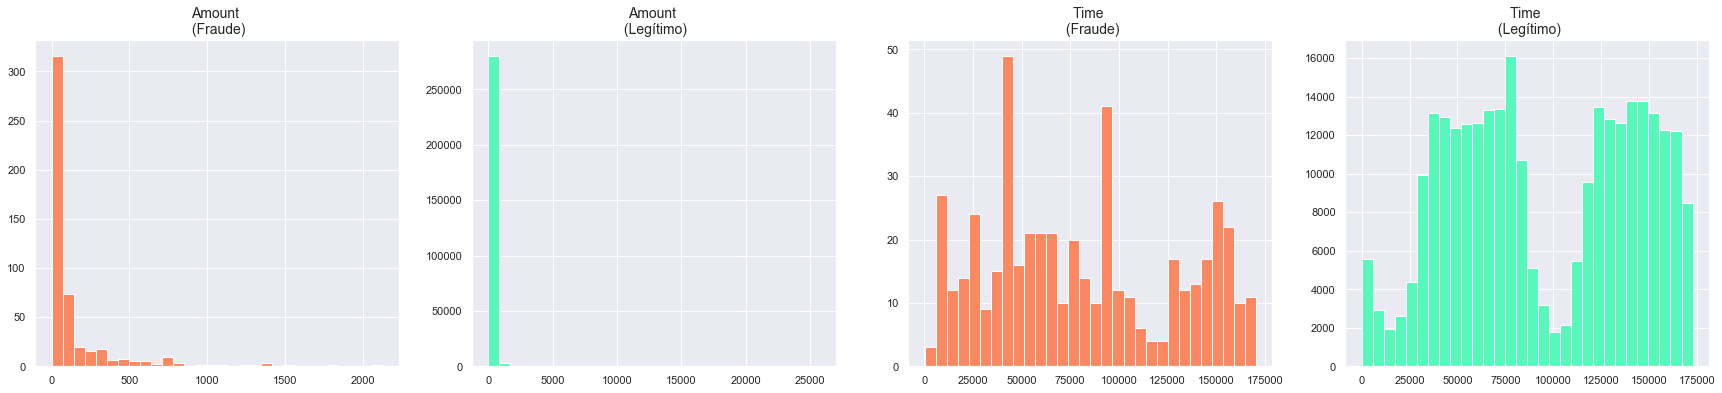

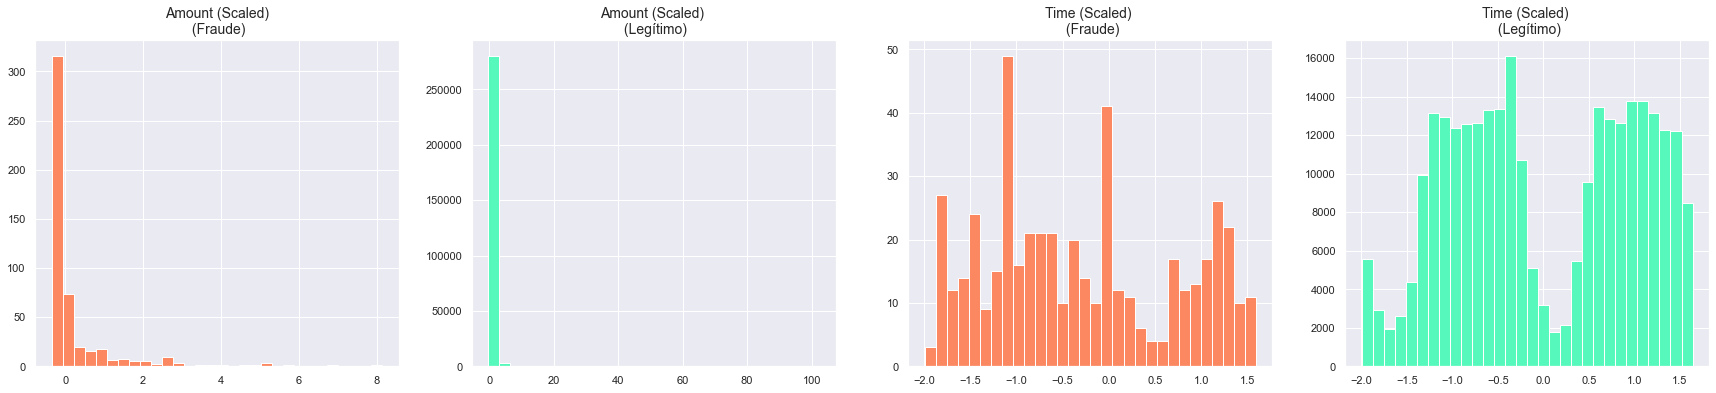

In [105]:
df_fraude = df[df['Class'] == 1]
df_clean = df[df['Class'] == 0]

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(30, 6))


ax1.hist(df_fraude['Amount'],color='#FB8861', bins = 30)
ax1.set_title('Amount \n (Fraude)', fontsize=14)

ax2.hist(df_clean['Amount'],color='#56F9BB', bins = 30)
ax2.set_title('Amount \n (Legítimo)', fontsize=14)

ax3.hist(df_fraude['Time'],color='#FB8861', bins = 30)
ax3.set_title('Time \n (Fraude)', fontsize=14)

ax4.hist(df_clean['Time'],color='#56F9BB', bins = 30)
ax4.set_title('Time \n (Legítimo)', fontsize=14)

plt.show

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(30, 6))


ax1.hist(df_fraude['scaled_amounts'],color='#FB8861', bins = 30)
ax1.set_title('Amount (Scaled)\n (Fraude)', fontsize=14)

ax2.hist(df_clean['scaled_amounts'],color='#56F9BB', bins = 30)
ax2.set_title('Amount (Scaled) \n (Legítimo)', fontsize=14)

ax3.hist(df_fraude['scaled_time'],color='#FB8861', bins = 30)
ax3.set_title('Time (Scaled) \n (Fraude)', fontsize=14)

ax4.hist(df_clean['scaled_time'],color='#56F9BB', bins = 30)
ax4.set_title('Time (Scaled) \n (Legítimo)', fontsize=14)

plt.show

df_fraude['Amount'].describe()
df_clean['Amount'].describe()

Ao comparar os casos de fraude com usos legitimos percebi:
+ Os horários onde fraudes são cometidas não parecem seguir um padrão claro, porém difere considerávelmente dos horários de uso legitimo.
+ Os valores dos usos em fraudes e legítimos também são parecidos. Então estabelecer uma relação somente entre valor de compra e fraude vai ser díficil.

No bloco acima já normalizei os dados para o algoritmo não criar um bias de acordo com a magnitude do número.

Outro desafio nesse dado é o "desequilibrio" entre as classes. Ou seja, tem muito mais transações legítimas do que fraudulentas.
Uma solução possível para isso é o UnderSampling. Vamos pegar todas as transações fraudulentas e pegar o mesmo número de transações legítimas.
Deste modo usamos dados reais que, ao contrário do OverSampling, criar dados fraudulentos poderia trazer um bias maior para nosso projeto.

No bloco a seguir vamos fazer UnderSampling nas transações legítimas para termos uma relação de 50/50 entre dados de transações fraudulentas e transações legítimas.
Removeremos também as colunas Time e amount originais, pois não serão usadas para treinar o modelo.
Veremos a Matriz de Correlação para ver o quanto cada variável influência na variável Class.

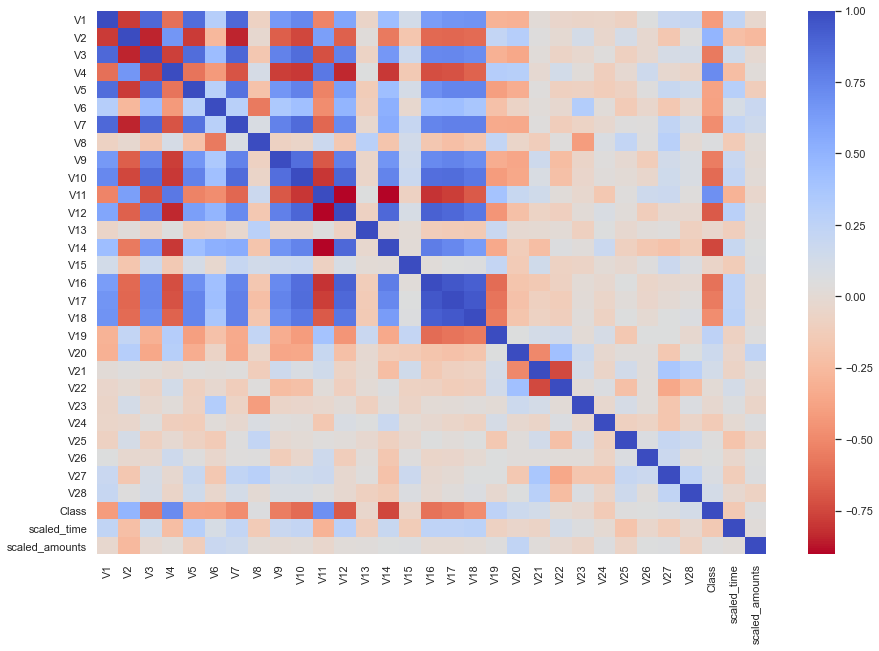

In [108]:
import seaborn as sns

#del df['Time']
#del df['Amount']
#Embaralha a dataFrame original
df = df.sample(frac=1, random_state=0)

df_fraude = df.loc[df['Class'] == 1]

#Fazer o UnderSampling de transações legítimas.
df_legit = df.loc[df['Class'] == 0][:492]

#Concatenar as DataFrame
df_under = pd.concat([df_fraude, df_legit])

#Embaralha a nova DataFrame pois a função concat deixa elas em ordem.
df_under = df_under.sample(frac=1, random_state=0)


df_under = df_under.sample(frac=1, random_state=0)

#df_under.describe()

df_under_corr = df_under.corr()
sns.heatmap(df_under_corr, cmap='coolwarm_r', annot_kws={'size':20})
sns.set(rc={"figure.figsize":(15, 10)})
plt.show()


Observando a Matriz de correlação é possível observar:

- As variáveis V3, V9, V10, V12, V14 tem forte correlação negativa, ou seja, quanto menor o valor mais provável da transação ser fraudulenta.
    
- As variáveis V4,V11 tem forte correlação positiva, ou seja, quanto maior os valores mais chances da trasação ser fraudulenta.
    
- Os valores das transações tem pouca relevancia se a transação é fraudulenta ou não e o horário da transação aparenta ser negativamente correlacionada, porém este dado de correlação não é importante pois o tempo é sequencial e seu valor númerico é irrelevante.

Correlação não implica causalidade, porém acredito que eu não perderia nada ao processar essas variáveis para tentar obter melhores resultados.

Na próxima parte vamos analisar as variáveis com maior correlação e eliminar os outliers extremos para nos aproximar de uma distribuição normal mantendo o máximo de informação.

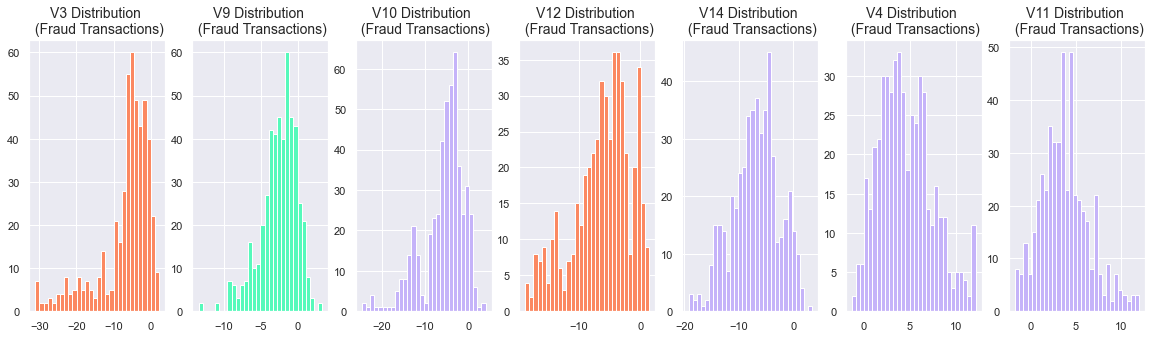

In [109]:
from scipy import stats
import numpy as np
from scipy.signal import freqz
from pylab import *
import matplotlib.pyplot as plt

import PyQt5

import matplotlib
from matplotlib.backends.backend_qt4agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure
from matplotlib.axes import Subplot

f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1,7, figsize=(20, 5))


v3_fraud_dist = df_under['V3'].loc[df_under['Class'] == 1].values
ax1.hist(v3_fraud_dist, color='#FB8861', bins = 30)
ax1.set_title('V3 Distribution \n (Fraud Transactions)', fontsize=14)

v9_fraud_dist = df_under['V9'].loc[df_under['Class'] == 1].values
ax2.hist(v9_fraud_dist, color='#56F9BB', bins = 30)
ax2.set_title('V9 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = df_under['V10'].loc[df_under['Class'] == 1].values
ax3.hist(v10_fraud_dist, color='#C5B3F9', bins = 30)
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = df_under['V12'].loc[df_under['Class'] == 1].values
ax4.hist(v12_fraud_dist,  color='#FB8861', bins = 30)
ax4.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v14_fraud_dist = df_under['V14'].loc[df_under['Class'] == 1].values
ax5.hist(v14_fraud_dist, color='#C5B3F9', bins = 30)
ax5.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v4_fraud_dist = df_under['V4'].loc[df_under['Class'] == 1].values
ax6.hist(v4_fraud_dist, color='#C5B3F9', bins = 30)
ax6.set_title('V4 Distribution \n (Fraud Transactions)', fontsize=14)

v11_fraud_dist = df_under['V11'].loc[df_under['Class'] == 1].values
ax7.hist(v11_fraud_dist, color='#C5B3F9', bins = 30)
ax7.set_title('V11 Distribution \n (Fraud Transactions)', fontsize=14)


plt.show()

Consegui observar uma possível distribuição normal em V9, V10, V14 e V12.
Para melhorar a precisão do modelo utilizarei Interquartile Range (IQR). Ao calcular o 25 quartil e 75 quartil escolherei uma constante que definirá quais pontos fora da distribuição normal serão retirados.
O teste de constantes foi feito manualmente.

In [110]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = df_under['V14'].loc[df_under['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

const = 1.5
v14_cut_off = v14_iqr * const
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

df_under = df_under.drop(df_under[(df_under['V14'] > v14_upper) | (df_under['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = df_under['V12'].loc[df_under['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * const
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
df_under = df_under.drop(df_under[(df_under['V12'] > v12_upper) | (df_under['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df_under)))
print('----' * 44)


# Removing outliers V9 feature
v9_fraud = df_under['V9'].loc[df_under['Class'] == 1].values
q25, q75 = np.percentile(v9_fraud, 25), np.percentile(v9_fraud, 75)
v9_iqr = q75 - q25

v9_cut_off = v9_iqr * const
v9_lower, v9_upper = q25 - v9_cut_off, q75 + v9_cut_off
print('V9 Lower: {}'.format(v9_lower))
print('V9 Upper: {}'.format(v9_upper))
outliers = [x for x in v9_fraud if x < v9_lower or x > v9_upper]
print('V9 outliers: {}'.format(outliers))
print('Feature V9 Outliers for Fraud Cases: {}'.format(len(outliers)))
df_under = df_under.drop(df_under[(df_under['V9'] > v9_upper) | (df_under['V9'] < v9_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df_under)))


# Removing outliers V10 Feature
v10_fraud = df_under['V10'].loc[df_under['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * const
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
df_under = df_under.drop(df_under[(df_under['V10'] > v10_upper) | (df_under['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df_under)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.0499976898594, -19.2143254902614, -18.8220867423816, -18.4937733551053]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.6837146333443, -18.0475965708216, -18.5536970096458, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V9 Lower: -8.388730817551277
V9 Upper: 3.7874511777857096
V9 outliers: [-9.46257260540015, -13.4340663

Vamos agora separar nossos dados de teste e de treino, rodar modelos e verificar a performance.
Vamos usar os modelos:
- Regressão Logística
- Arvores de Decisão
- Florestas de Decisão

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score


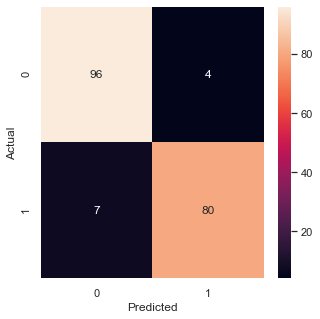

Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


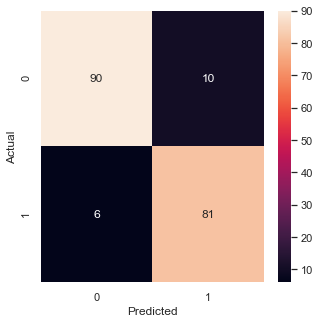

Classifiers:  RandomForestClassifier Has a training score of 93.0 % accuracy score


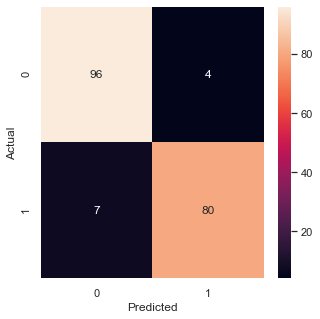


 

Classifiers:  LogisticRegression Has a test score of 95.0 % accuracy score


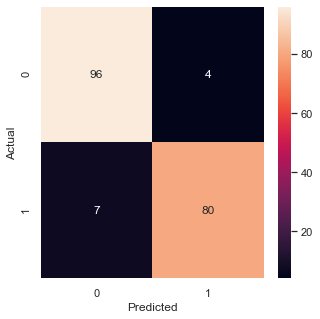

Classifiers:  DecisionTreeClassifier Has a test score of 90.0 % accuracy score


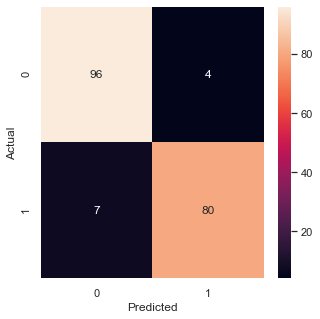

Classifiers:  RandomForestClassifier Has a test score of 95.0 % accuracy score


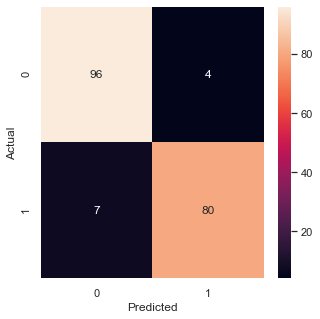

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X = df_under.drop('Class', axis=1)
y = df_under['Class']


sns.set(rc={"figure.figsize":(5, 5)})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifiers = {
    "LogisiticRegression": LogisticRegression(max_iter=200),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier()
}


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

    y_predicted = classifier.predict(X_test)
    confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])

    sns.heatmap(confusion_matrix, annot=True)
    plt.show()

print('\n \n')



for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_test, y_test, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a test score of", round(training_score.mean(), 2) * 100, "% accuracy score")


    sns.heatmap(confusion_matrix, annot=True)
    plt.show()

No set de teste todos os modelos apresentaram a mesma taxa de falsos negativos e a Regressão Logística e a Random Forests apresentaram a mesma acurácia de 95%